## <center>구조화된 데이터</center>

: 숫자나 텍스트 같은 데이터는 number나 string 형태로 데이터를 저장한다.<br/>
한 번에 연속열(Sequence)을 저장할 때는 배열(array) 자료 구조를 사용한다.<br/>
배열은 대표적으로 list, tuple이 있으며, 좀 더 간편하게 선형대수로 표현하기 위한 배열로 NumPydml ndarray를 사용한다. 

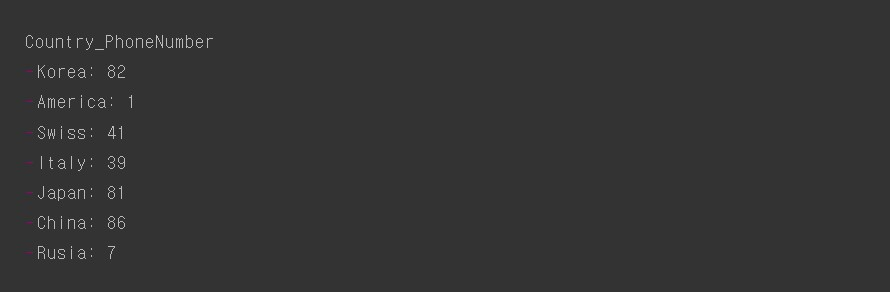
<center><span style="color:gray">국제전화 국가 번호 데이터</span></center>

: 위의 데이터의 값을 찾을 때는 인덱스가 아닌 "한국", "미국" 등의 키(key)를 사용해 데이터에 접근하는 데이터 구조(hash)를 이용한다.

> Hash
>> Key와 Value로 구성되어 있는 자료 구조로 두 열만 갖지만 수많은 행을 가지는 구조체

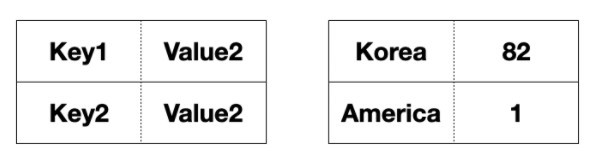

: hash는 다른 프로그래밍 언어에서는 매핑(mapping), 연관배열(associative array) 등으로 불리며,  
파이썬에서는 "딕셔너리(dictionary)" 또는 dict로 알려져 있다.

In [3]:
# 파이썬 dict 로 표현한 전화번호부 
Country_PhoneNumber = {
    'Korea': 82, 
    'America': 1, 
    'Swiss': 41, 
    'Italy': 39, 
    'Japan': 81, 
    'China': 86, 
    'Rusia': 7}
Country_PhoneNumber['Korea']  # 키를 가지고 값을 조회할 수 있다

82

## <center>딕셔너리(dictionary)를 활용한 간단한 logic 설계</center>

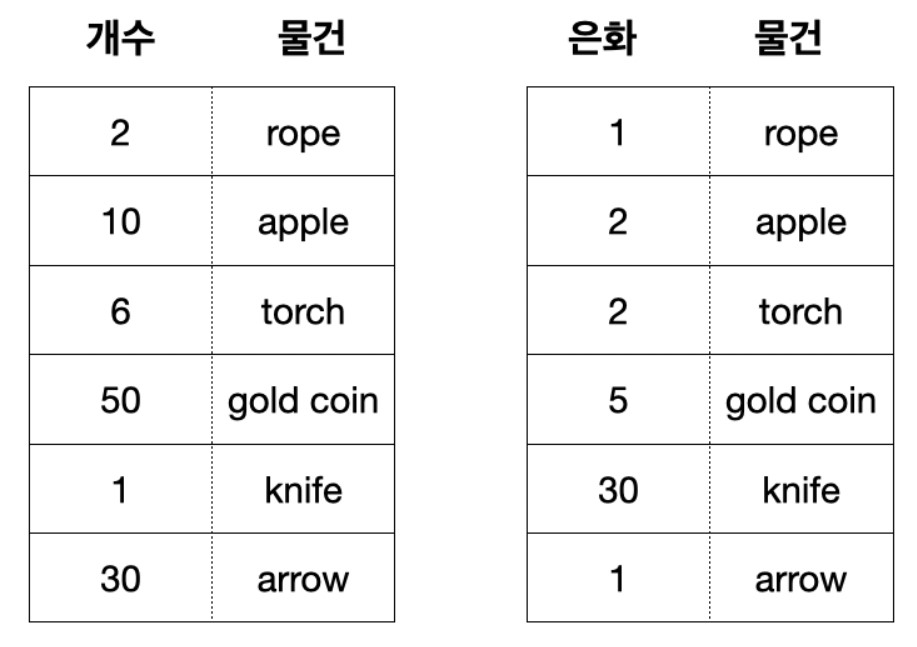

In [15]:
# 물품을 보여주는 함수
treasure_box = {'rope':2, 
                'apple':10, 
                'torch': 6, 
                'gold coin': 50, 
                'knife': 1, 
                'arrow': 30}

def display_stuff(treasure_box):
    for k, v in treasure_box.items():
        print("{} {}pcs".format(k, v))
display_stuff(treasure_box)

# 물품을 통해 얻은 은화를 보여주는 함수
coin_per_treasure = {
        'rope':1,
        'apple':2,
        'torch': 2,
        'gold coin': 5, 
        'knife': 30,
        'arrow': 1}

def total_silver(treasure_box, coin_per_treasure):
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure, coin_per_treasure[treasure], treasure_box[treasure], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
total_silver(treasure_box, coin_per_treasure)


rope 2pcs
apple 10pcs
torch 6pcs
gold coin 50pcs
knife 1pcs
arrow 30pcs
rope : 1coins/pcs * 2pcs = 2 coins
apple : 2coins/pcs * 10pcs = 20 coins
torch : 2coins/pcs * 6pcs = 12 coins
gold coin : 5coins/pcs * 50pcs = 250 coins
knife : 30coins/pcs * 1pcs = 30 coins
arrow : 1coins/pcs * 30pcs = 30 coins
total_coin :  344


In [21]:
#  위 코드를 조금 더 간단히 하면
treasure_box = {'rope': {'coin': 1, 'pcs': 2},
                'apple': {'coin': 2, 'pcs': 10},
                'torch': {'coin': 2, 'pcs': 6},
                'gold coin': {'coin': 5, 'pcs': 50},
                'knife': {'coin': 30, 'pcs': 1},
               	'arrow': {'coin': 1, 'pcs': 30}
               }

def display_stuff(treasure_box):
    ## type your code
    for treasure in treasure_box:
        print("{} {}pcs".format(treasure, treasure_box[treasure]['pcs']))                                 
display_stuff(treasure_box)

def total_silver(treasure_box, coin_per_treasure):
    ## type your code
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]['pcs']
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure,
          coin_per_treasure[treasure],
          treasure_box[treasure]['pcs'], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
total_silver(treasure_box, coin_per_treasure)

rope 2pcs
apple 10pcs
torch 6pcs
gold coin 50pcs
knife 1pcs
arrow 30pcs
rope : 1coins/pcs * 2pcs = 2 coins
apple : 2coins/pcs * 10pcs = 20 coins
torch : 2coins/pcs * 6pcs = 12 coins
gold coin : 5coins/pcs * 50pcs = 250 coins
knife : 30coins/pcs * 1pcs = 30 coins
arrow : 1coins/pcs * 30pcs = 30 coins
total_coin :  344


: treasure_box에 포함된 5개의 데이터는 내부적으로 coin과 pcs라는 내부구조를 갖는다.  
**데이터 내부에 자체적인 서브 구조를 가지는 데이터를 구조화된 데이터**라고 한다.

## <center>구조화된 데이터와 pandas (1)Series

: 구조화된 데이터를 효과적으로 표현하기 위해 pandas 라이브러리는 Series와 DataFrame이라는 자료 구조를 제공한다.

* pandas 특징
    * NumPy기반에서 개발되어 NumPy를 사용하는 애플리케이션에서 쉽게 사용 가능
    * 축의 이름에 따라 데이터를 정렬할 수 있는 자료 구조
    * 다양한 방식으로 인덱싱(indexing)하여 데이터를 다룰 수 있는 기능
    * 통합된 시계열 기능과 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
    * 누락된 데이터 처리 기능
    * 데이터베이스처럼 데이터를 합치고 관계 연산을 수행하는 기능

##### Series

In [22]:
import pandas as pd
ser = pd.Series(['a', 'b', 'c', 3])
ser

0    a
1    b
2    c
3    3
dtype: object

##### Index of Series

In [23]:
ser.values

array(['a', 'b', 'c', 3], dtype=object)

In [24]:
ser.index     # int index

RangeIndex(start=0, stop=4, step=1)

<h6> 인덱스 설정: Series의 인자로 넣어주는 방법

In [25]:
ser2 = pd.Series(['a', 'b', 'c', 3], index=['i', 'j', 'k', 'h'])
ser2

i    a
j    b
k    c
h    3
dtype: object

###### 인덱스 설정: 할당 연산자

In [26]:
ser2.index = ['Jhon', 'Steve', 'Jack', 'Bob']
ser2

Jhon     a
Steve    b
Jack     c
Bob      3
dtype: object

In [27]:
ser2.index

Index(['Jhon', 'Steve', 'Jack', 'Bob'], dtype='object')

: Series에서 인덱스는 기본적으로 정수 형태로 설정, 사용자가 원하면 값 할당 가능

In [28]:
# Series를 이용한 딕셔너리 타입 데이터 출력
Country_PhoneNumber = {
    'Korea': 82, 
    'America': 1, 
    'Swiss': 41, 
    'Italy': 39, 
    'Japan': 81,
    'China': 86,
    'Rusia': 7}
ser3 = pd.Series(Country_PhoneNumber)
ser3

Korea      82
America     1
Swiss      41
Italy      39
Japan      81
China      86
Rusia       7
dtype: int64

###### Slicing of  Series

In [29]:
ser3['Korea']

82

In [30]:
ser3['Italy':]

Italy    39
Japan    81
China    86
Rusia     7
dtype: int64

###### Name of Series

: Series Object와 Series Index 모두 name attribute 존재

In [31]:
ser3.name = 'Country_PhoneNumber'
ser3.index.name = 'Country_Name'
ser3

Country_Name
Korea      82
America     1
Swiss      41
Italy      39
Japan      81
China      86
Rusia       7
Name: Country_PhoneNumber, dtype: int64

### <center>(2) DataFrame </center> 

: DataFrame은 표(table)와 같은 자료 구조  
: DataFrame은 여러 개의 컬럼을 나타낼 수 있다

In [32]:
# Series로 변환
data = {'Region' : ['Korea', 'America', 'Chaina', 'Canada', 'Italy'],
        'Sales' : [300, 200, 500, 150, 50],
        'Amount' : [90, 80, 100, 30, 10],
        'Employee' : [20, 10, 30, 5, 3]
        }
s = pd.Series(data)
s

Region      [Korea, America, Chaina, Canada, Italy]
Sales                      [300, 200, 500, 150, 50]
Amount                        [90, 80, 100, 30, 10]
Employee                         [20, 10, 30, 5, 3]
dtype: object

In [33]:
# DataFrame으로 변환
d = pd.DataFrame(data)
d

,Region,Sales,Amount,Employee
0,Korea,300,90,20
1,America,200,80,10
2,Chaina,500,100,30
3,Canada,150,30,5
4,Italy,50,10,3


In [38]:
d.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [39]:
d.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [40]:
d.index=['one','two','three','four','five']
d.columns = ['a','b','c','d']
d

,a,b,c,d
one,Korea,300,90,20
two,America,200,80,10
three,Chaina,500,100,30
four,Canada,150,30,5
five,Italy,50,10,3


##### 구조화된 데이터의 표현법

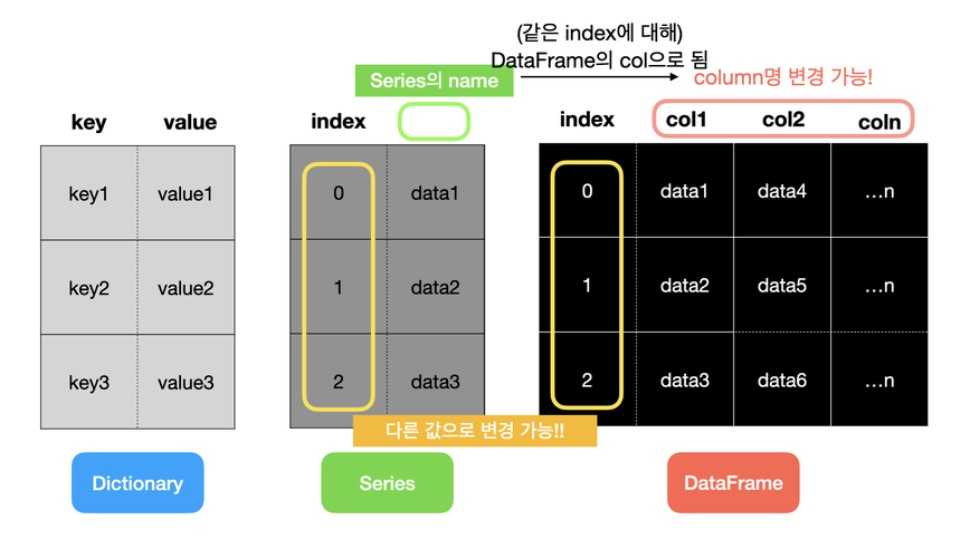

##### pandas를 활용한 EDA

* 데이터셋 - COVID19
    * [캐글 COVID-19 in Italy](https://www.kaggle.com/sudalairajkumar/covid19-in-italy)

In [69]:
# csv 파일 읽기
import pandas as pd
import os

csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/covid19_italy_region.csv"
data = pd.read_csv(csv_path)
type(data)

pandas.core.frame.DataFrame

In [70]:
data

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,793,2020-04-01T17:00:00,ITA,9,Toscana,43.769231,11.255889,1120,297,1417,3015,4432,259,182,253,4867,36575
794,794,2020-04-01T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,345,76,421,1062,1483,124,214,173,1870,7675
795,795,2020-04-01T17:00:00,ITA,10,Umbria,43.106758,12.388247,173,45,218,646,864,17,194,37,1095,9080
796,796,2020-04-01T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,85,27,112,428,540,3,32,59,631,1717


In [71]:
data.head() # 첫 5개 행

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [72]:
data.tail() # 마지막 5개 행

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
793,793,2020-04-01T17:00:00,ITA,9,Toscana,43.769231,11.255889,1120,297,1417,3015,4432,259,182,253,4867,36575
794,794,2020-04-01T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,345,76,421,1062,1483,124,214,173,1870,7675
795,795,2020-04-01T17:00:00,ITA,10,Umbria,43.106758,12.388247,173,45,218,646,864,17,194,37,1095,9080
796,796,2020-04-01T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,85,27,112,428,540,3,32,59,631,1717
797,797,2020-04-01T17:00:00,ITA,5,Veneto,45.434905,12.338452,1718,350,2068,6156,8224,470,902,499,9625,112746


In [73]:
data.head(3) # 조정 가능

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1


In [74]:
data.columns  # 데이터셋에 존재하는 컬럼명 확인

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [75]:
data.info() # .info() 각 컬럼별 Null값과 자료형을 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        798 non-null    int64  
 1   Date                       798 non-null    object 
 2   Country                    798 non-null    object 
 3   RegionCode                 798 non-null    int64  
 4   RegionName                 798 non-null    object 
 5   Latitude                   798 non-null    float64
 6   Longitude                  798 non-null    float64
 7   HospitalizedPatients       798 non-null    int64  
 8   IntensiveCarePatients      798 non-null    int64  
 9   TotalHospitalizedPatients  798 non-null    int64  
 10  HomeConfinement            798 non-null    int64  
 11  CurrentPositiveCases       798 non-null    int64  
 12  NewPositiveCases           798 non-null    int64  
 13  Recovered                  798 non-null    int64  

In [76]:
data.describe() # 각 컬럼별로 기본 통계데이터를 보여줌

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,798.00000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,398.50000,10.190476,43.046293,12.225955,533.058897,82.596491,615.655388,674.998747,1290.654135,138.553885,205.706767,162.677945,1659.038847,7932.164160
std,230.50705,5.798698,2.490342,2.660615,1532.090841,190.735985,1719.508711,1627.086600,3282.834715,327.616052,1060.433732,700.264327,4945.629053,17067.087279
min,0.00000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000
25%,199.25000,5.000000,41.125596,11.121231,5.000000,0.000000,6.000000,8.000000,14.250000,2.000000,0.000000,0.000000,14.250000,230.000000
50%,398.50000,10.000000,43.616760,12.388247,64.000000,16.000000,80.500000,109.000000,205.000000,32.000000,3.000000,6.000000,210.500000,1610.000000
75%,597.75000,15.000000,45.434905,13.768136,325.750000,71.750000,396.250000,552.750000,998.750000,117.750000,34.000000,55.750000,1110.750000,7493.000000
max,797.00000,20.000000,46.499335,16.867367,11927.000000,1342.000000,13269.000000,12496.000000,25765.000000,3251.000000,11415.000000,7593.000000,44773.000000,121449.000000


In [77]:
data.isnull().sum()  # 결측값(Missing value)확인

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

In [78]:
# 범주형 데이터로 기제되는 컬럼에 대해서는 value_counts() 메서드를 사용해
# 각 범주(Case or Category)별로 값이 몇 개 있는지 구할 수 있다.
data['RegionName'].value_counts()

Abruzzo                  38
Molise                   38
Valle d'Aosta            38
Umbria                   38
P.A. Trento              38
Toscana                  38
Sicilia                  38
Sardegna                 38
Puglia                   38
Piemonte                 38
Marche                   38
Basilicata               38
Lombardia                38
Liguria                  38
Lazio                    38
Friuli Venezia Giulia    38
Emilia-Romagna           38
Campania                 38
Calabria                 38
P.A. Bolzano             38
Veneto                   38
Name: RegionName, dtype: int64

In [79]:
data['Country'].value_counts()

ITA    798
Name: Country, dtype: int64

In [80]:
data['RegionName'].value_counts().sum()  # 컬럼별 통계 수치의 합 확인

798

In [81]:
data['Country'].value_counts().sum()  # 컬럼별 통계 수치의 합 확인

798

In [82]:
# sum()을 컬럼에 단독으로 적용해서 해당 컬럼값의 총합을 구할 수 있음.
print("총 감염자", data['TotalPositiveCases'].sum())
print("전체 검사자 수", data['TestsPerformed'].sum())
print("사망자 수", data['Deaths'].sum())
print("회복자 수", data['Recovered'].sum())

총 감염자 1323913
전체 검사자 수 6329867
사망자 수 129817
회복자 수 164154


In [83]:
data.sum() # DataFrame 전체의 각 컬럼별 합 

SNo                                                                     318003
Date                         2020-02-24T18:00:002020-02-24T18:00:002020-02-...
Country                      ITAITAITAITAITAITAITAITAITAITAITAITAITAITAITAI...
RegionCode                                                                8132
RegionName                   AbruzzoBasilicataP.A. BolzanoCalabriaCampaniaE...
Latitude                                                          34350.941591
Longitude                                                          9756.312476
HospitalizedPatients                                                    425381
IntensiveCarePatients                                                    65912
TotalHospitalizedPatients                                               491293
HomeConfinement                                                         538649
CurrentPositiveCases                                                   1029942
NewPositiveCases                                    

In [84]:
# .corr 을 이용한 상관관계 분석 (최소 두 개의 매개변수 인자 필요)
print(data['TestsPerformed'].corr(data['TotalPositiveCases']))
print(data['TestsPerformed'].corr(data['Deaths']))
print(data['TotalPositiveCases'].corr(data['Deaths']))

data.corr()

0.8555291657820235
0.7612209669865387
0.975268668316802


,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
SNo,1.000000,-0.006385,0.004550,-0.009905,0.304934,0.356195,0.311208,0.424331,0.373320,0.290469,0.206334,0.251302,0.327629,0.427816
RegionCode,-0.006385,1.000000,-0.959568,0.652820,-0.288057,-0.321805,-0.292356,-0.275990,-0.289923,-0.316658,-0.205056,-0.218793,-0.267394,-0.271954
Latitude,0.004550,-0.959568,1.000000,-0.547164,0.232802,0.262618,0.236559,0.246010,0.245838,0.264146,0.168196,0.181795,0.224989,0.244442
Longitude,-0.009905,0.652820,-0.547164,1.000000,-0.259902,-0.279147,-0.262538,-0.208338,-0.240774,-0.270345,-0.180529,-0.197115,-0.226441,-0.158840
HospitalizedPatients,0.304934,-0.288057,0.232802,-0.259902,1.000000,0.980457,0.999762,0.923389,0.981327,0.912586,0.923919,0.944874,0.983282,0.809607
IntensiveCarePatients,0.356195,-0.321805,0.262618,-0.279147,0.980457,1.000000,0.984517,0.916971,0.970160,0.930570,0.876121,0.892060,0.958143,0.840098
TotalHospitalizedPatients,0.311208,-0.292356,0.236559,-0.262538,0.999762,0.984517,1.000000,0.924459,0.981982,0.916342,0.920400,0.940839,0.982391,0.814551
HomeConfinement,0.424331,-0.275990,0.246010,-0.208338,0.923389,0.916971,0.924459,1.000000,0.979855,0.831487,0.850907,0.896904,0.959858,0.928523
CurrentPositiveCases,0.373320,-0.289923,0.245838,-0.240774,0.981327,0.970160,0.981982,0.979855,1.000000,0.892083,0.903833,0.937337,0.990303,0.886860
NewPositiveCases,0.290469,-0.316658,0.264146,-0.270345,0.912586,0.930570,0.916342,0.831487,0.892083,1.000000,0.760710,0.775184,0.865022,0.755386


In [85]:
# drop() 메서드를 이용한 낮은 상관관게의 컬럼 제거
data.drop(['Latitude','Longitude','Country','Date','HospitalizedPatients',  'IntensiveCarePatients', 'TotalHospitalizedPatients','HomeConfinement','RegionCode','SNo'], axis=1, inplace=True)

data.corr()

,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
CurrentPositiveCases,1.000000,0.892083,0.903833,0.937337,0.990303,0.886860
NewPositiveCases,0.892083,1.000000,0.760710,0.775184,0.865022,0.755386
Recovered,0.903833,0.760710,1.000000,0.986324,0.954026,0.741827
Deaths,0.937337,0.775184,0.986324,1.000000,0.975269,0.761221
TotalPositiveCases,0.990303,0.865022,0.954026,0.975269,1.000000,0.855529
TestsPerformed,0.886860,0.755386,0.741827,0.761221,0.855529,1.000000


.head(): 테이터셋의 처음 5개 행을 보여주고, tail()은 마지막 5개 행을 보여준다. 또한 정수 인자를 넣어서 행의 개수를 지정할수 있다.

.info(): 각 컬럼별로 Null값과 자료형을 보여주는 메서드입니다.

.describe(): 각 컬럼별로 기본 통계 데이터를 보여주는 메서드에요. 개수(Count), 평균(mean), 표준편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 최댓값(max)를 보여 줍니다

.isnull().sum(): pandas에서 missing 데이터를 isnull()로 확인하고, sum()메서드를 활용해서 missing 데이터 개수의 총합을 구할 수 있습니다

value_counts(): 메서드를 사용해 각 범주(Case 또는Category)별로 값이 몇 개 있는지 구할 수 있어요

.value_counts().sum(): 컬럼별 통계 수치의 합을 확인

.corr(): 두 컬럼 내 데이터가 얼마만큼의 상관관계가 있는지를 나타내는 것

.drop(): 컬럼 삭제

.mean(): 평균 계산

.median(): 중앙값 계산

.var(): 분산 계산

.std(): 표준편차 계산

.argmin(), argmax(): 최고, 최대값을 가지고 있는 값을 반환

.idxmin(), idxmax(): 최고, 최대값을 가지고 있는 인덱스를 반환

.cumsum(): 누접 합을 계산

.pct_change(): 퍼센트 변화율을 계산

* [Pandas 주요 기능](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)